In [182]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime

In [184]:
datetime.datetime.strptime("2015-09-21",'%Y-%m-%d') + datetime.timedelta(100)

datetime.datetime(2015, 12, 30, 0, 0)

In [2]:
os.listdir()

['.flaskenv',
 'app.py',
 'data',
 'data.xlsx',
 'Dockerfile',
 'package',
 'requirements.txt',
 'steps',
 'test.ipynb',
 'utilities',
 '__pycache__']

In [3]:
df = pd.read_csv('./data/data.csv')

In [4]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [5]:
df.head()

,date,store_id,day_of_week,is_open,has_promo,is_state_holiday,is_school_holiday,future,year,calender_week,...,last_school_holiday_since_days,next_state_holiday_in_days,next_school_holiday_in_days,cosinus_day,sinus_day,sales,will_be_open_next_day_False,will_be_open_next_day_True,will_be_open_next_day_False.1,will_be_open_next_day_True.1
0,2013-01-02,1.0,3.0,1.0,0.0,0.0,1.0,0.0,2013.0,1.0,...,1.0,86.0,1.0,0.999407,0.034422,4928.5,0,0,0,1
1,2013-01-03,1.0,4.0,1.0,0.0,0.0,1.0,0.0,2013.0,1.0,...,1.0,85.0,1.0,0.998667,0.051620,4327.0,0,0,0,1
2,2013-01-04,1.0,5.0,1.0,0.0,0.0,1.0,0.0,2013.0,1.0,...,1.0,84.0,1.0,0.997630,0.068802,4741.5,0,0,0,1
3,2013-01-05,1.0,6.0,1.0,0.0,0.0,1.0,0.0,2013.0,1.0,...,1.0,83.0,1.0,0.996298,0.085965,4741.5,0,0,1,0
4,2013-01-07,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2013.0,2.0,...,1.0,81.0,1.0,0.992749,0.120208,5288.5,0,0,0,1


C:\Users\a035284\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


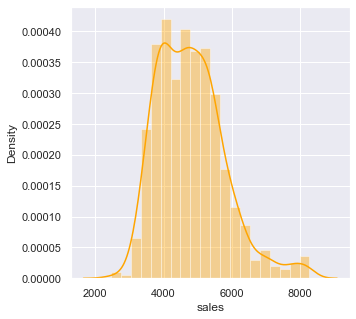

In [6]:
ax = sns.distplot(df.sales,
                  kde=True,
                  color='orange')

In [7]:
import scipy.stats as st
def get_best_distribution(data):
    print(data)
    dist_names = ["norm", "exponweib","weibull_max", "weibull_min", "pareto", "genextreme","uniform","expon","gausshyper","gamma","laplace","lognorm","loguniform","maxwell"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        # print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    # print("Best fitting distribution: "+str(best_dist))
    # print("Best p value: "+ str(best_p))
    # print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, dist_results

In [8]:
a, b, c = get_best_distribution(df.sales)

0      4928.5
1      4327.0
2      4741.5
3      4741.5
4      5288.5
        ...  
676    3531.0
677    3932.0
678    4005.0
679    5208.0
680    5208.0
Name: sales, Length: 681, dtype: float64


C:\Users\a035284\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_continuous_distns.py:1726: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +
C:\Users\a035284\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [9]:
a

'maxwell'

In [10]:
description = st.describe(df.sales)

In [11]:
description

DescribeResult(nobs=681, minmax=(2462.0, 8277.0), mean=4794.854625550661, variance=986529.0207469551, skewness=0.8396601938253709, kurtosis=0.9506704525037382)

In [12]:
series = df[["date","sales"]]

In [13]:
series.head()

,date,sales
0,2013-01-02,4928.5
1,2013-01-03,4327.0
2,2013-01-04,4741.5
3,2013-01-05,4741.5
4,2013-01-07,5288.5


<AxesSubplot:xlabel='date', ylabel='sales'>

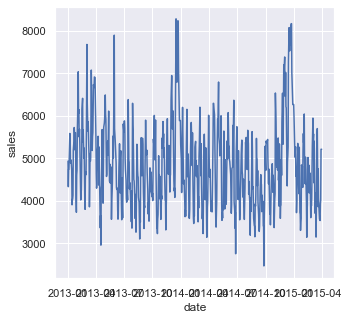

In [12]:
sns.lineplot(data=series,x="date",y="sales")

In [14]:
series

,date,sales
0,2013-01-02,4928.5
1,2013-01-03,4327.0
2,2013-01-04,4741.5
3,2013-01-05,4741.5
4,2013-01-07,5288.5
...,...,...
676,2015-03-25,3531.0
677,2015-03-26,3932.0
678,2015-03-27,4005.0
679,2015-03-28,5208.0


In [15]:
series = series.dropna()
series['date'] = pd.to_datetime(series['date'])

series = series.set_index('date').asfreq('D')
series = series.fillna(axis = 0,method='ffill')


In [16]:
series.head()

,sales
date,
2013-01-02,4928.5
2013-01-03,4327.0
2013-01-04,4741.5
2013-01-05,4741.5
2013-01-06,4741.5


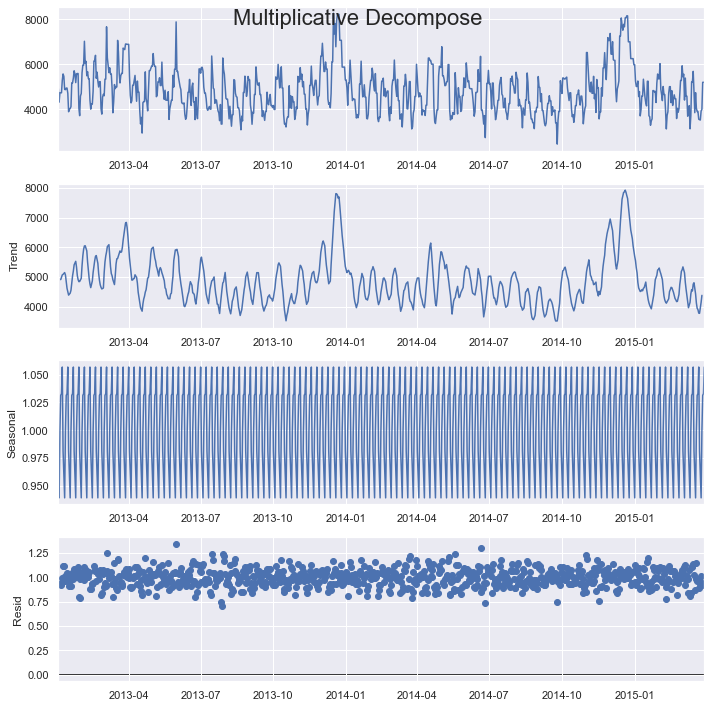

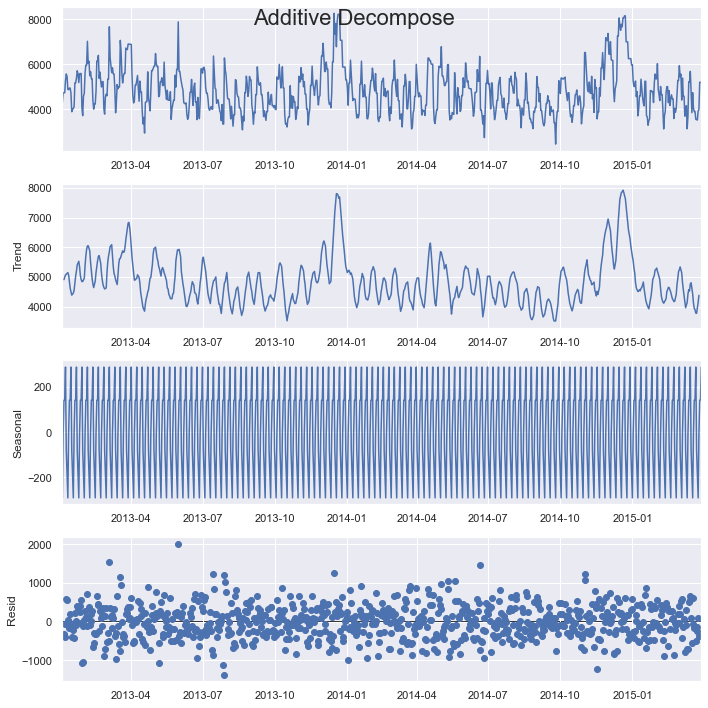

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Additive Decomposition
result_add = seasonal_decompose(series, model='additive')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(series, model='multiplicative' )

trend = result_mul.trend
seasonal = result_mul.seasonal
residual = result_mul.resid

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.savefig("seasonal_decomposition.png")

In [18]:
trend

date
2013-01-02            NaN
2013-01-03            NaN
2013-01-04            NaN
2013-01-05    4906.928571
2013-01-06    4984.428571
                 ...     
2015-03-26    4142.285714
2015-03-27    4377.000000
2015-03-28            NaN
2015-03-29            NaN
2015-03-30            NaN
Freq: D, Name: trend, Length: 818, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  trend   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.651
Date:                Fri, 03 Dec 2021   Prob (F-statistic):             0.0177
Time:                        10:20:15   Log-Likelihood:                -6561.3
No. Observations:                 812   AIC:                         1.313e+04
Df Residuals:                     810   BIC:                         1.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4962.3407     54.885     90.413      0.0

Text(0.5, 1.0, 'Residuals')

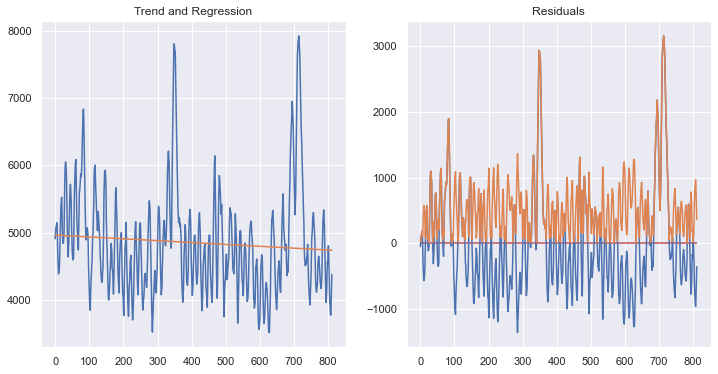

In [34]:

import statsmodels.api as sm
from statsmodels.api import OLS

x, y = np.arange(len(result_mul.trend.dropna())), result_mul.trend.dropna()
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(result_mul.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(result_mul.trend.dropna()))])
ax[1].plot(res.resid.values)
ax[1].plot(np.abs(res.resid.values))
ax[1].hlines(0, 0, len(res.resid), color='r')
ax[0].set_title("Trend and Regression")
ax[1].set_title("Residuals")

In [35]:
series.head()

,sales
date,
2013-01-02,4928.5
2013-01-03,4327.0
2013-01-04,4741.5
2013-01-05,4741.5
2013-01-06,4741.5


In [36]:
from statsmodels.tsa.stattools import adfuller

r = adfuller(series, autolag='AIC')

In [37]:
from statsmodels.tsa.stattools import adfuller

adfuller(series)

(-5.009853063767415,
 2.1217941612467164e-05,
 15,
 802,
 {'1%': -3.4385299921076995,
  '5%': -2.8651505256266865,
  '10%': -2.568692571687987},
 12345.036644712762)

In [38]:
print(f'Test Statistics: {r[0]}')
print(f'P-value: {r[1]}')
if abs(r[1]) < 0.05:
    print('Null hypothesis is rejected! Time series is stationary')
else:
    print('Null hypothesis is accepted! ')

Test Statistics: -5.009853063767415
P-value: 2.1217941612467164e-05
Null hypothesis is rejected! Time series is stationary


In [25]:
from statsmodels.stats.stattools import durbin_watson

In [29]:
# res = residual.dropna()

In [30]:
res

date
2013-01-05    0.936898
2013-01-06    0.920895
2013-01-07    0.987856
2013-01-08    1.118406
2013-01-09    1.114531
                ...   
2015-03-23    0.892658
2015-03-24    0.958629
2015-03-25    0.929921
2015-03-26    1.011010
2015-03-27    0.915914
Freq: D, Name: resid, Length: 812, dtype: float64

In [44]:
autocorrelation = durbin_watson(res.resid)

if autocorrelation < 1.5 or autocorrelation > 2.5:
    print('autocorrelation detected!')
    if autocorrelation < 1.5 and autocorrelation > 0.5:
        print('Positive serial correlation')
    if autocorrelation < 0.5:
        print('Strong positive serial correlation')
    if autocorrelation > 2.5 and autocorrelation < 3.5:
        print('Negative serial correlation')
    if autocorrelation > 3.5:
        print('Strong negative serial correlation')
else: 
    print('No serial correlation.')
    

autocorrelation detected!
Strong positive serial correlation


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            681 non-null    datetime64[ns]
 1   store_id                        681 non-null    float64       
 2   day_of_week                     681 non-null    float64       
 3   is_open                         681 non-null    float64       
 4   has_promo                       681 non-null    float64       
 5   is_state_holiday                681 non-null    float64       
 6   is_school_holiday               681 non-null    float64       
 7   future                          681 non-null    float64       
 8   year                            681 non-null    float64       
 9   calender_week                   681 non-null    float64       
 10  christmas                       681 non-null    float64       
 11  easter

In [49]:
import pandas as pd
from mwarehouse.forecasting.preprocessing import simple_ts_split

# Load data

# Make sure, the time column has Datetime-Format
df['date'] = pd.to_datetime(df['date'])

# Execute simple_ts_split for traditional models
sgl_train_trad_df, sgl_val_trad_df, sgl_test_trad_df, sgl_future_frame_trad = simple_ts_split(
    df,
    time_column="date",
    shift=1,
    holdout=5,
    train_size=0.7,
    set_ts_index=True,
    frequency='D',
    sin_cos_features=False
)

In [56]:
sgl_future_frame_trad

,store_id,day_of_week,is_open,has_promo,is_state_holiday,is_school_holiday,future,year,calender_week,christmas,...,last_school_holiday_since_days,next_state_holiday_in_days,next_school_holiday_in_days,cosinus_day,sinus_day,sales,will_be_open_next_day_False,will_be_open_next_day_True,will_be_open_next_day_False.1,will_be_open_next_day_True.1
date,,,,,,,,,,,,,,,,,,,,,
2015-03-24,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2015.0,13.0,0.0,...,74.0,10.0,6.0,0.141540,0.989932,3547.0,0,0,0,1
2015-03-25,1.0,3.0,1.0,0.0,0.0,0.0,0.0,2015.0,13.0,0.0,...,75.0,9.0,5.0,0.124479,0.992222,3531.0,0,0,0,1
2015-03-26,1.0,4.0,1.0,0.0,0.0,0.0,0.0,2015.0,13.0,0.0,...,76.0,8.0,4.0,0.107381,0.994218,3932.0,0,0,0,1
2015-03-27,1.0,5.0,1.0,0.0,0.0,0.0,0.0,2015.0,13.0,0.0,...,77.0,7.0,3.0,0.090252,0.995919,4005.0,0,0,0,1
2015-03-28,1.0,6.0,1.0,0.0,0.0,0.0,0.0,2015.0,13.0,0.0,...,78.0,6.0,2.0,0.073095,0.997325,5208.0,0,0,1,0
2015-03-30,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2015.0,14.0,0.0,...,80.0,4.0,1.0,0.038722,0.999250,5208.0,0,0,0,1


In [91]:
start = df.date.max() + np.timedelta64(1,'D')
start = start.strftime('%Y-%m-%d')

In [92]:
end = df.date.max() + np.timedelta64(6,'D')
end = end.strftime('%Y-%m-%d')

In [93]:
print(start)
print(end)

2015-03-31
2015-04-05


In [136]:
time = pd.date_range(start, periods=6, freq='D').to_numpy()

In [137]:
time.shape

(6,)

In [149]:
empty = np.empty((time.shape[0],2))
empty[:] = np.NaN

In [150]:
empty

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [151]:
time

array(['2015-03-31T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-04-02T00:00:00.000000000', '2015-04-03T00:00:00.000000000',
       '2015-04-04T00:00:00.000000000', '2015-04-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [153]:
newdf = pd.DataFrame(columns=['date','sales'],data=empty)

In [154]:
newdf.date = time

In [158]:
old_df = df[['date','sales']]

In [159]:
old_df.head(2)

,date,sales
0,2013-01-02,4928.5
1,2013-01-03,4327.0


In [155]:
newdf

,date,sales
0,2015-03-31,NaN
1,2015-04-01,NaN
2,2015-04-02,NaN
3,2015-04-03,NaN
4,2015-04-04,NaN
5,2015-04-05,NaN


In [165]:
combined_df = old_df.append(newdf).reset_index(drop=True).tail(20)

In [167]:
combined_df.fillna(method='ffill')

,date,sales
667,2015-03-14,5225.0
668,2015-03-16,5695.0
669,2015-03-17,4806.0
670,2015-03-18,3858.0
671,2015-03-19,4748.0
672,2015-03-20,4057.0
673,2015-03-21,3909.0
674,2015-03-23,3565.0
675,2015-03-24,3547.0
676,2015-03-25,3531.0


In [169]:
combined_df.shape[1]

2